In [ ]:
#Part 1: Analyzing Best-Seller Trends Across Product Categories
#Objective: Understand the relationship between product categories and their best-seller status.

#Crosstab Analysis:
  #Create a crosstab between the product category and the isBestSeller status.
  #Are there categories where being a best-seller is more prevalent?

#Statistical Tests:
  #Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
  #Compute Cramér's V to understand the strength of association between best-seller status and category.

  #Visualizations:
  #Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [1]:
import pandas as pd
file_path = '/Users/ikram/lab-eda-univariate/amz_uk_price_prediction_dataset 4.csv'
df = pd.read_csv('/Users/ikram/lab-eda-univariate/amz_uk_price_prediction_dataset.csv')
print(df.head())

   uid        asin                                              title  stars  \
0    1  B09B96TG33  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
1    2  B01HTH3C8S  Anker Soundcore mini, Super-Portable Bluetooth...    4.7   
2    3  B09B8YWXDF  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
3    4  B09B8T5VGV  Echo Dot with clock (5th generation, 2022 rele...    4.7   
4    5  B09WX6QD65  Introducing Echo Pop | Full sound compact Wi-F...    4.6   

   reviews  price  isBestSeller  boughtInLastMonth        category  
0    15308  21.99         False                  0  Hi-Fi Speakers  
1    98099  23.99          True                  0  Hi-Fi Speakers  
2    15308  21.99         False                  0  Hi-Fi Speakers  
3     7205  31.99         False                  0  Hi-Fi Speakers  
4     1881  17.99         False                  0  Hi-Fi Speakers  


In [15]:
# Crosstab Analysis
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'], normalize='index')

# Sort categories by proportion of best-sellers
crosstab_result = crosstab_result.sort_values(by=True, axis=0, ascending=False)
print("Proportion of IsBestSeller per product categories:")
print(crosstab_result)

Proportion of IsBestSeller per product categories:
isBestSeller                         False     True 
category                                            
Grocery                           0.941865  0.058135
Smart Home Security & Lighting    0.942308  0.057692
Health & Personal Care            0.942314  0.057686
Mobile Phone Accessories          0.957529  0.042471
Power & Hand Tools                0.964661  0.035339
...                                    ...       ...
CD, Disc & Tape Players           1.000000  0.000000
General Music-Making Accessories  1.000000  0.000000
Snowboard Boots                   1.000000  0.000000
Boxes & Organisers                1.000000  0.000000
eBook Readers & Accessories       1.000000  0.000000

[296 rows x 2 columns]


In [95]:
#Statistical Tests:
  #Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
from scipy.stats import chi2_contingency
chi2, p, _, _ = chi2_contingency(crosstab_result)
print("\nChi-square test p-value:", p)
print(chi2)

#Compute Cramér's V to understand the strength of association between best-seller status and category.
# Compute Cramér's V
import numpy as np
n = df.shape[0]  # Taille de l'échantillon
c = df['category'].nunique()  # Nombre de catégories
r = 2  # Nombre de niveaux dans la variable 'isBestSeller' (oui/non)

V = np.sqrt(chi2 / (n * min(c-1, r-1)))
print("Cramér's V:", V)

#interpretation of the result



Chi-square test p-value: 1.0
3.913070774334609
Cramér's V: 0.0012654333071309496


In [65]:
importants_categories = df['category'].value_counts().head(50)
print(importants_categories)

# Calculer la somme des fréquences des 50 catégories les plus importantes
sum_top_50_categories = importants_categories.sum()

# Calculer le pourcentage des 50 catégories les plus importantes par rapport au total
percentage_top_50_categories = (sum_top_50_categories / total_rows) * 100

print("Pourcentage des 50 catégories les plus importantes par rapport au total des catégories :", percentage_top_5_categories)


category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Manicure & Pedicure Products               18940
Skin Care                                  18769
Make-up                                    18756
Hair Care                                  18735
Fragrances                                 18564
Handmade Gifts                             18295
Handmade Home Décor                        18146
Luggage and travel gear                    18142
Handmade Jewellery                         18044
Handmade Artwork                           17878
Women                                      17772
Handmade Home & Kitchen Products           17435
Handmade Kitchen & Dining                  17432
Men                                        17417
Baby                                       15050
Handmade   

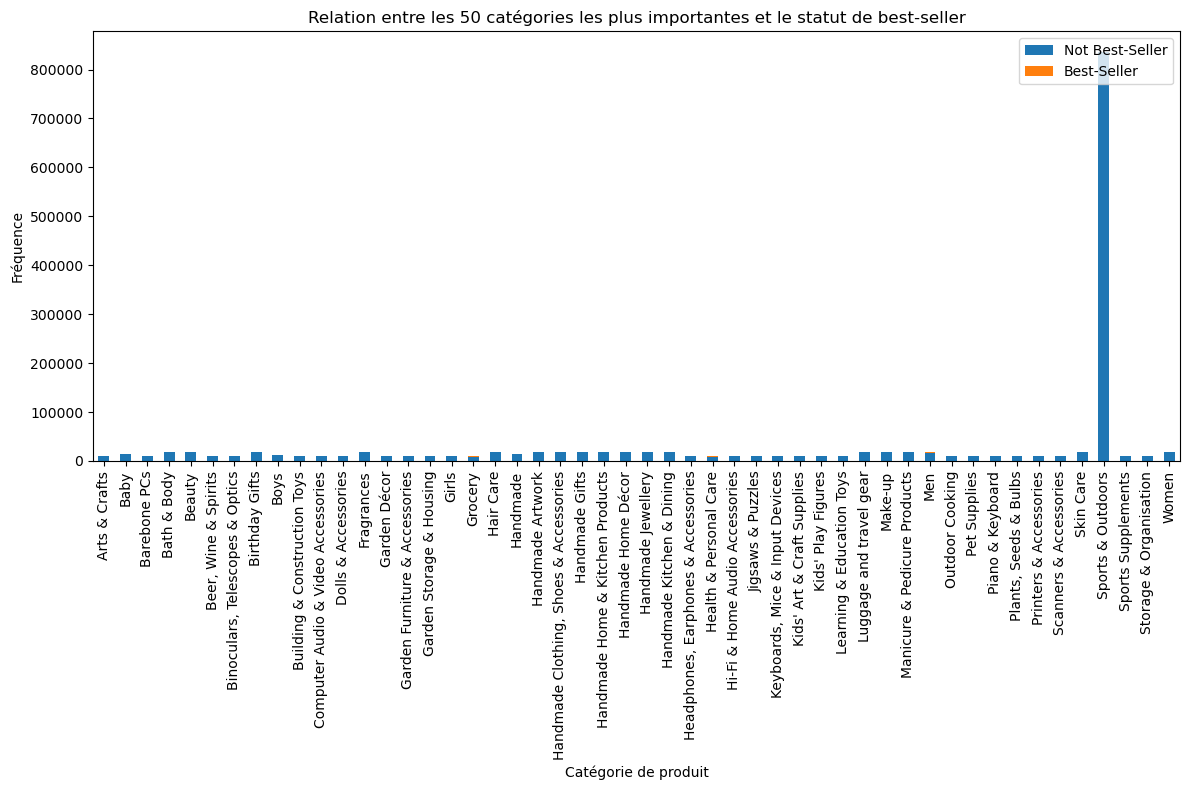

In [67]:
# Filtrer les données pour ne conserver que les lignes correspondant aux 50 catégories les plus importantes
df_top_50_categories = df[df['category'].isin(importants_categories.index)]

# Calculer la fréquence de best-sellers pour chaque catégorie parmi les 50 catégories les plus importantes
category_counts_top_50 = df_top_50_categories.groupby(['category', 'isBestSeller']).size().unstack(fill_value=0)

# Tracer le graphique à barres empilées
category_counts_top_50.plot(kind='bar', stacked=True, figsize=(12, 8))

# Ajouter des titres et des étiquettes d'axe
plt.title('Relation entre les 50 catégories les plus importantes et le statut de best-seller')
plt.xlabel('Catégorie de produit')
plt.ylabel('Fréquence')
plt.xticks(rotation=90)  # Faire pivoter les étiquettes de l'axe x pour une meilleure lisibilité
plt.legend(['Not Best-Seller', 'Best-Seller'], loc='upper right')

# Afficher le graphique
plt.tight_layout()
plt.show()


In [ ]:
#Part 2: Exploring Product Prices and Ratings Across Categories and Brands
#Objective: Investigate how different product categories influence product prices.

#Preliminary Step: Remove outliers in product prices.

#For this purpose, we can use the IQR (Interquartile Range) method. 
#Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. 
#The next steps will be done with the dataframe without outliers.

In [69]:
# Calculate Quartiles
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Identify Outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove Outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


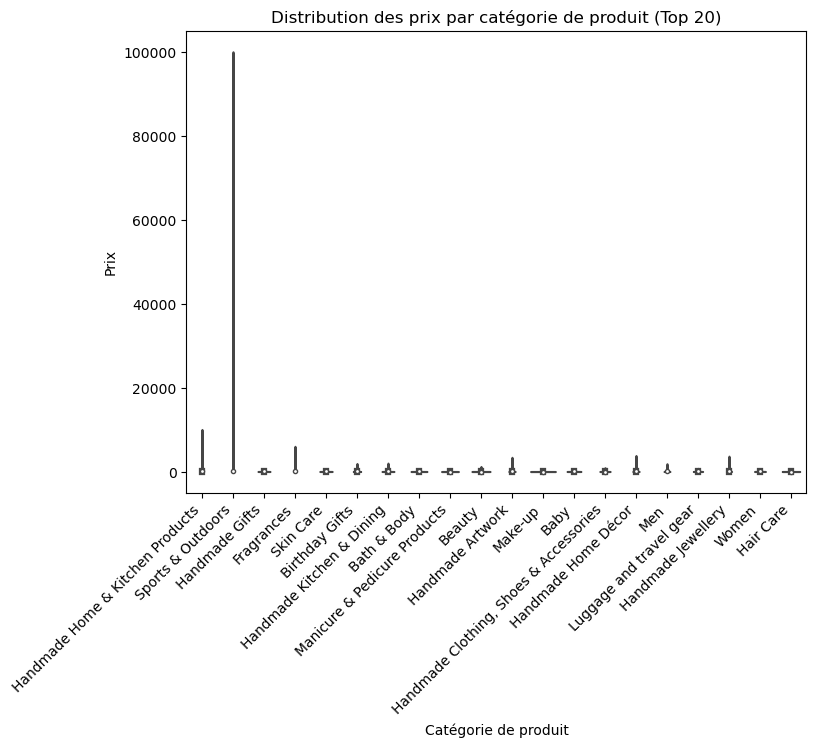

La catégorie de produit avec le prix médian le plus élevé est : Laptops


In [85]:
#Violin Plots:
#Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
#Which product category tends to have the highest median price? Don't filter here by top categories.

# Filtrer les 20 catégories de produits les plus courantes
top_20_categories = df['category'].value_counts().head(20).index
df_top_20_categories = df[df['category'].isin(top_20_categories)]

# Créer le Violin Plot
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.violinplot(x='category', y='price', data=df_top_20_categories)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution des prix par catégorie de produit (Top 20)')
plt.xlabel('Catégorie de produit')
plt.ylabel('Prix')
plt.show()

# Identifier la catégorie de produit avec le prix médian le plus élevé
highest_median_category = df.groupby('category')['price'].median().idxmax()
print("La catégorie de produit avec le prix médian le plus élevé est :", highest_median_category)


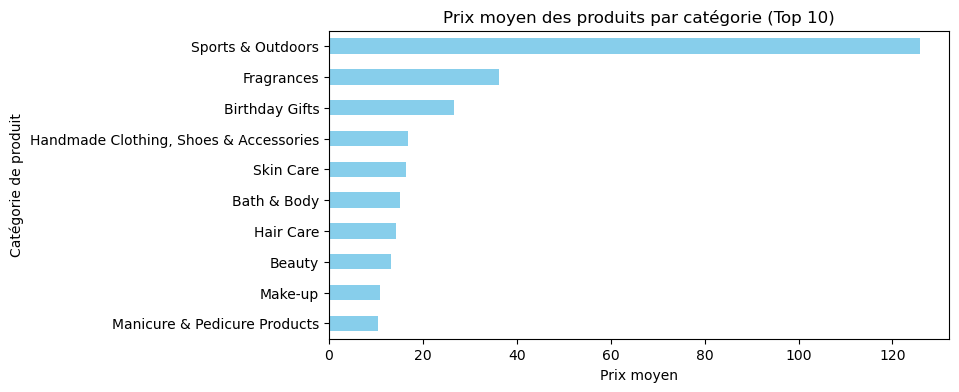

La catégorie de produit avec le prix moyen le plus élevé est : Sports & Outdoors


In [83]:
#Bar Charts:
#Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
#Which product category commands the highest average price? Don't filter here by top categories.
# Calculer les prix moyens par catégorie
average_price_by_category = df.groupby('category')['price'].mean()

# Sélectionner les 10 catégories de produits les plus courantes
top_10_categories = df['category'].value_counts().head(10).index
average_price_top_10_categories = average_price_by_category[top_10_categories]

# Tracer le graphique à barres
plt.figure(figsize=(8, 4))
average_price_top_10_categories.sort_values().plot(kind='barh', color='skyblue')
plt.title('Prix moyen des produits par catégorie (Top 10)')
plt.xlabel('Prix moyen')
plt.ylabel('Catégorie de produit')
plt.show()

# Identifier la catégorie avec le prix moyen le plus élevé
highest_average_price_category = average_price_top_10_categories.idxmax()
print("La catégorie de produit avec le prix moyen le plus élevé est :", highest_average_price_category)



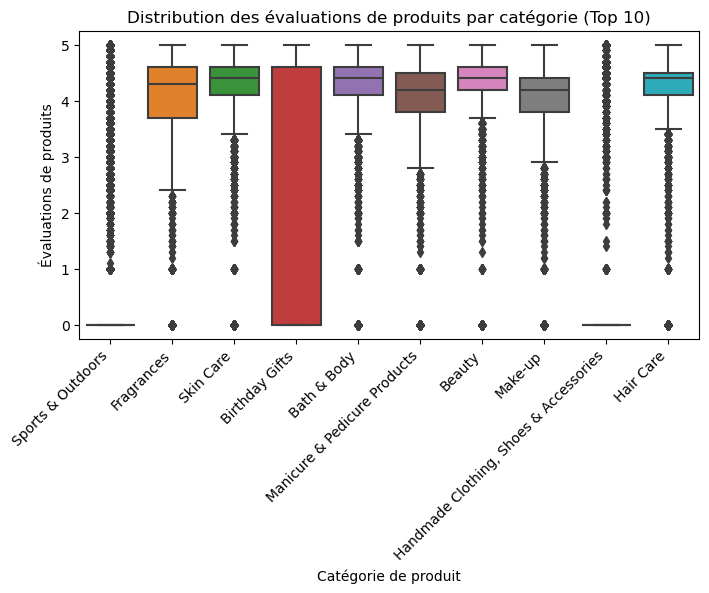

La catégorie de produit avec la médiane d'évaluation la plus élevée est : Computer Memory


In [81]:
#Box Plots:
#Visualize the distribution of product ratings based on their category using side-by-side box plots. 
#Filter out the top 10 categories based on count for better visualization.
#Which category tends to receive the highest median rating from customers? Don't filter here by top categories.
import seaborn as sns

# Filtrer les données pour inclure uniquement les 10 catégories de produits les plus courantes
top_10_categories = df['category'].value_counts().head(10).index
df_top_10_categories = df[df['category'].isin(top_10_categories)]

# Créer les box plots côte à côte
plt.figure(figsize=(8, 4))
sns.boxplot(x='category', y='stars', data=df_top_10_categories)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution des évaluations de produits par catégorie (Top 10)')
plt.xlabel('Catégorie de produit')
plt.ylabel('Évaluations de produits')
plt.show()

# Identifier la catégorie avec la médiane d'évaluation la plus élevée
highest_median_rating_category = df.groupby('category')['stars'].median().idxmax()
print("La catégorie de produit avec la médiane d'évaluation la plus élevée est :", highest_median_rating_category)

In [ ]:
#Part 3: Investigating the Interplay Between Product Prices and Ratings
#Objective: Analyze how product ratings (stars) correlate with product prices.

In [87]:
#Correlation Coefficients:
#Calculate the correlation coefficient between price and stars.
#Is there a significant correlation between product price and its rating?
# Calculer le coefficient de corrélation entre le prix et les évaluations
correlation_coefficient = df['price'].corr(df['stars'])

print("Coefficient de corrélation entre le prix et les évaluations :", correlation_coefficient)

#INTERPRETATION
#The correlation coefficient between price and ratings is approximately -0.125.
#This indicates a weak negative correlation between product prices and their ratings. 
#In other words, there is a slight tendency for cheaper products to have slightly higher ratings, and vice versa. 
#However, this correlation is weak, suggesting that price alone cannot significantly explain variations in product ratings. 
#Other factors may also influence product ratings independently of their price.

Coefficient de corrélation entre le prix et les évaluations : -0.1249067326214869


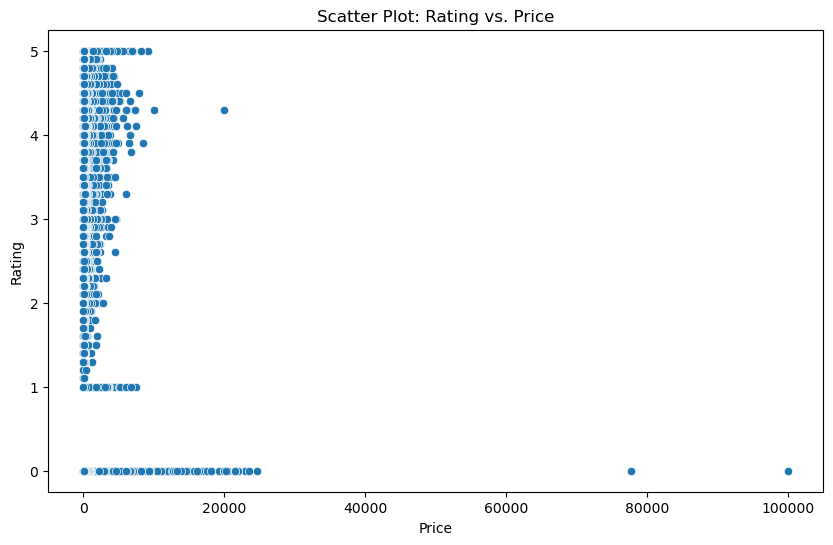

ValueError: could not convert string to float: 'B09B96TG33'

<Figure size 1000x600 with 0 Axes>

In [89]:
#Visualizations:
#Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
#Use a correlation heatmap to visualize correlations between all numerical variables.
#Examine if product prices typically follow a normal distribution using a QQ plot.

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Scatter plot: Rating vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='stars', data=df)
plt.title('Scatter Plot: Rating vs. Price')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# QQ plot for product prices
plt.figure(figsize=(8, 6))
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title('QQ Plot for Product Prices')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')
plt.show()
